# Assignment 1 Worked Examples


The goal is to use data-driven insights to address the issue of employee attrition and develop strategies to retain valuable talent within the organization.

#Worked Examples

##Worked Example 1 'IBM HR Dataset'

## Setup Stage

In [1]:
!pip install h2o
!pip install shap
!pip install seaborn
import seaborn as sns
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch


from sklearn.model_selection import train_test_split
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.3-py2.py3-none-any.whl size=240945068 sha256=b674fbc24c490024c3aee5cea08c904a32881b1194da232e3c8eb0e8627e1eea
  Stored in directory: /root/.cache/pip/wheels/f9/7d/1d/e1258f0558603969a8393cb5b22a18e313337f01627a118302
Successfully built h2o
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.8 MB/s eta 0:00:00


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


# Data Cleaning

The dataset contains a column to check whether an employee is over 18 years of age. As it is a legal requirement it can be dropped. Similarly columns like HourlyRate, DailyRate EmployeeCount, Education, EducationField can be dropped as they don't directly corelate to attrition reason.

In [2]:
### Reading data from the github repository
data = pd.read_csv('https://raw.githubusercontent.com/Aditya260698/Advances-In-Data-Science/main/IBMHRAttritionDataset.csv')
### getting data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Plotting the data

In [3]:
### Checking if data is null or not
data.isnull().sum()

### Encoding data as 1 and 0 without increasing the dimensionality of the database
one_hot = {'Yes': 1, 'No': 0, 'Y':1, 'N':0, 'Male': 0, 'Female': 1}
data.Attrition = [one_hot[item] for item in data.Attrition]
data.OverTime = [one_hot[item] for item in data.OverTime]
data.Over18 = [one_hot[item] for item in data.Over18]
data.Gender = [one_hot[item] for item in data.Gender]

### Using pd.get_dummies() to create one-hot encofidng where data type was Object
data = pd.get_dummies(data, columns = ['BusinessTravel', 'Department', 'MaritalStatus', 'EducationField'])
data = data.drop(['EmployeeCount', 'HourlyRate', 'DailyRate', 'Over18', 'StandardHours', 'JobRole', 'EmployeeNumber'], axis = 1)

### Specifying data type as int64
data = data.astype('int64')
### Making sure data type is correctly changed
print(data.info())
print(data.corr())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   Gender                             1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  OverTime            

##QQ Plot

<Figure size 800x500 with 0 Axes>

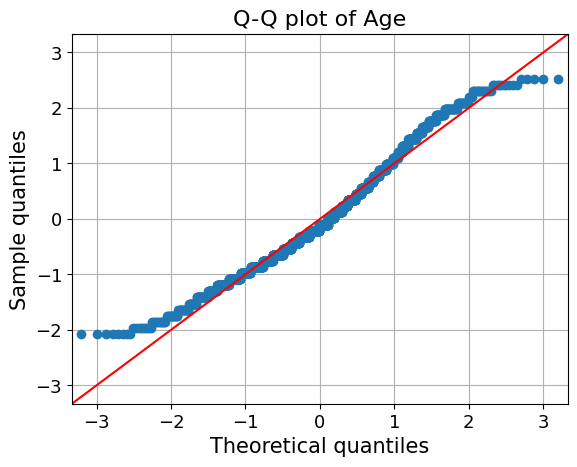

<Figure size 800x500 with 0 Axes>

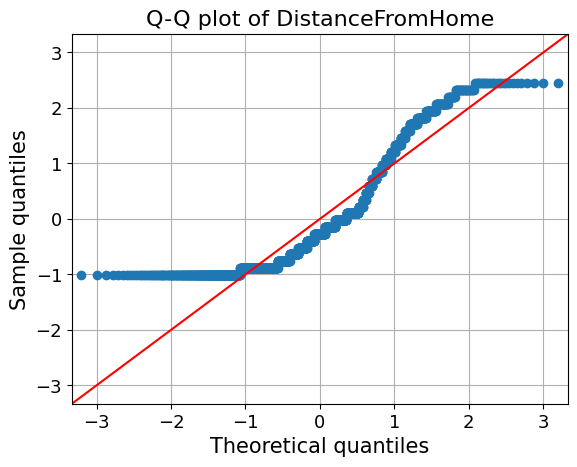

<Figure size 800x500 with 0 Axes>

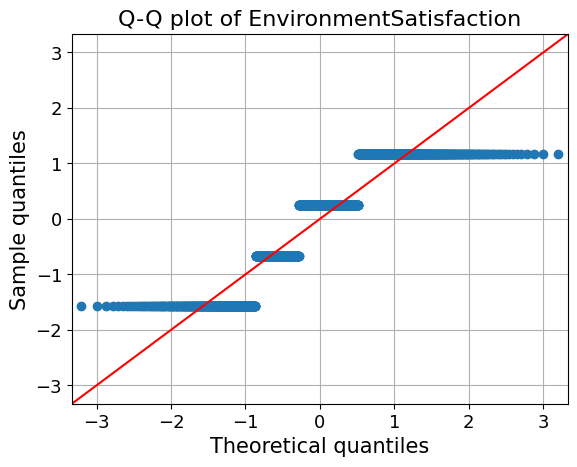

<Figure size 800x500 with 0 Axes>

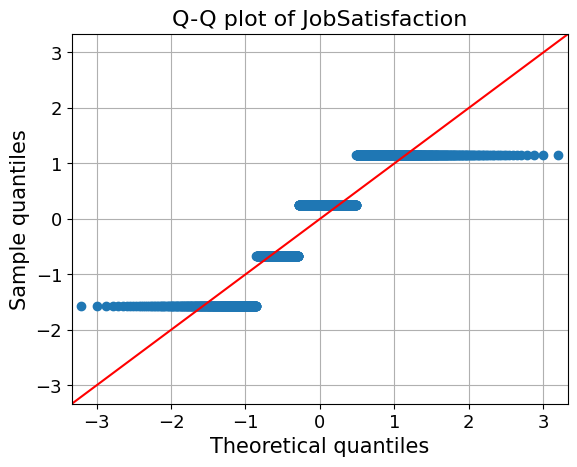

<Figure size 800x500 with 0 Axes>

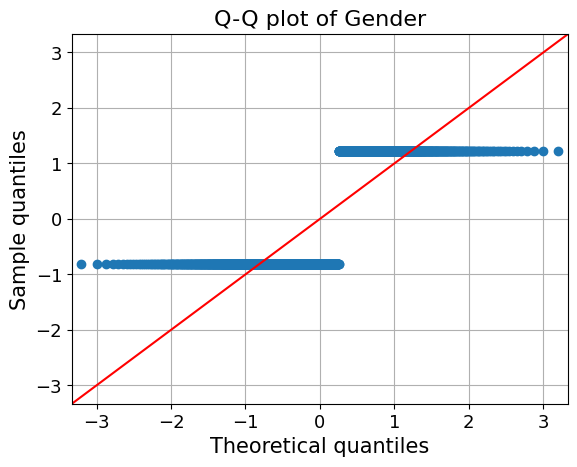

<Figure size 800x500 with 0 Axes>

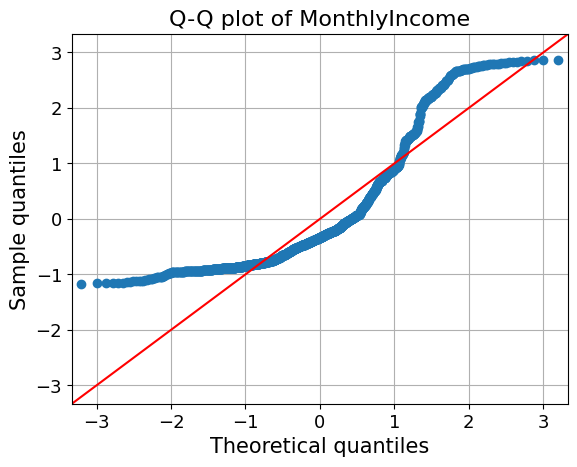

<Figure size 800x500 with 0 Axes>

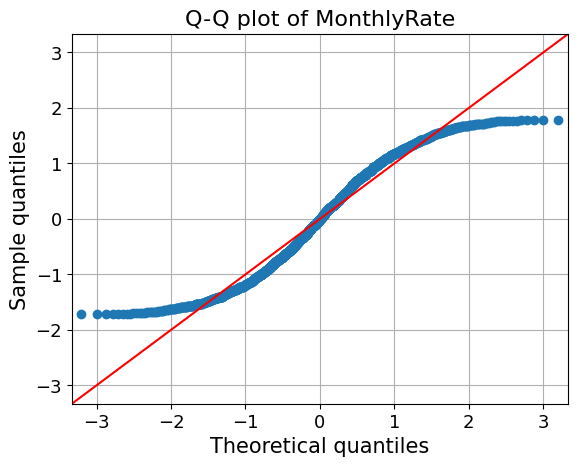

<Figure size 800x500 with 0 Axes>

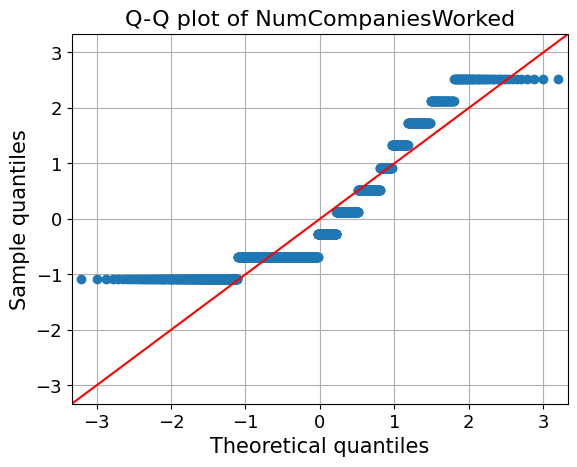

<Figure size 800x500 with 0 Axes>

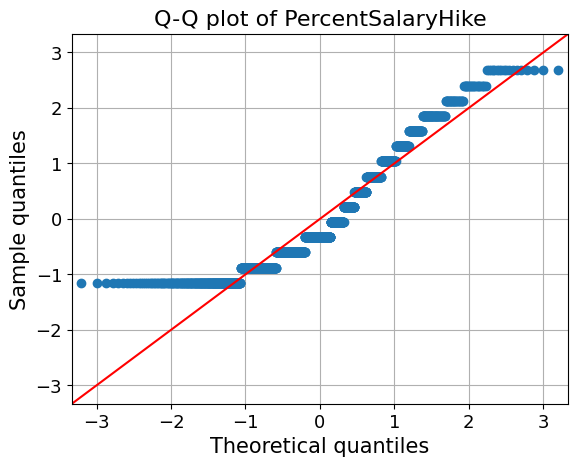

<Figure size 800x500 with 0 Axes>

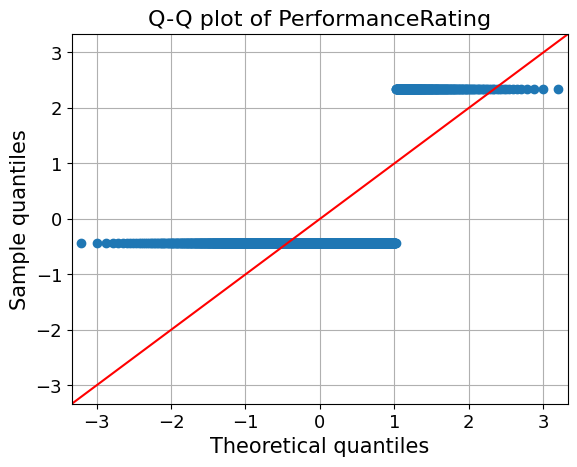

<Figure size 800x500 with 0 Axes>

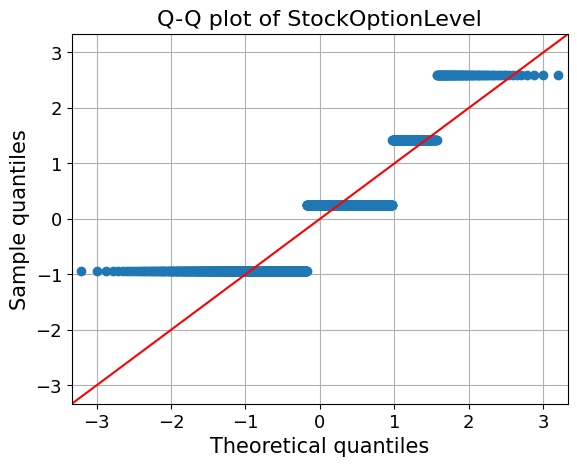

<Figure size 800x500 with 0 Axes>

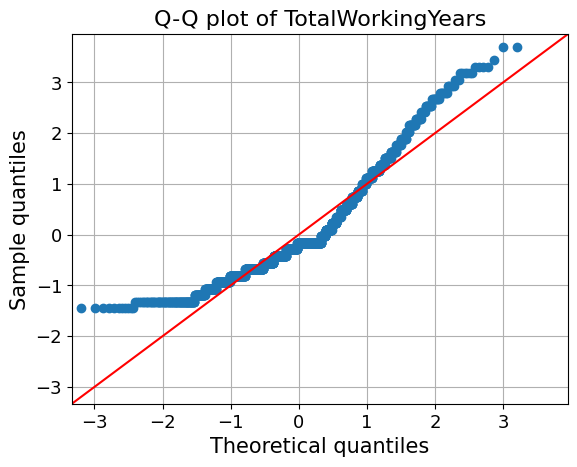

<Figure size 800x500 with 0 Axes>

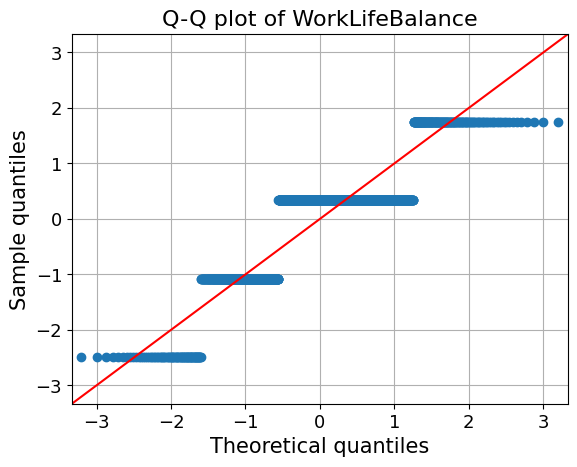

<Figure size 800x500 with 0 Axes>

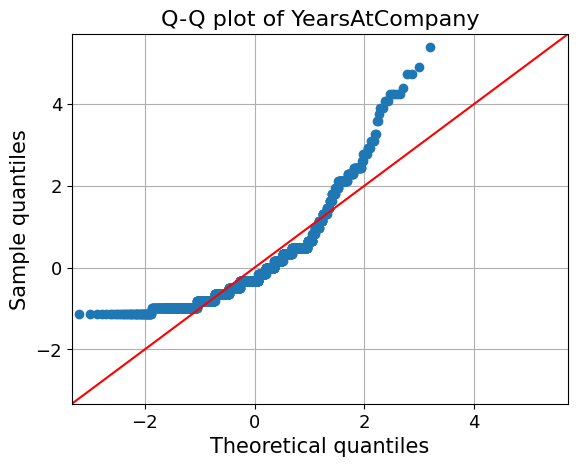

<Figure size 800x500 with 0 Axes>

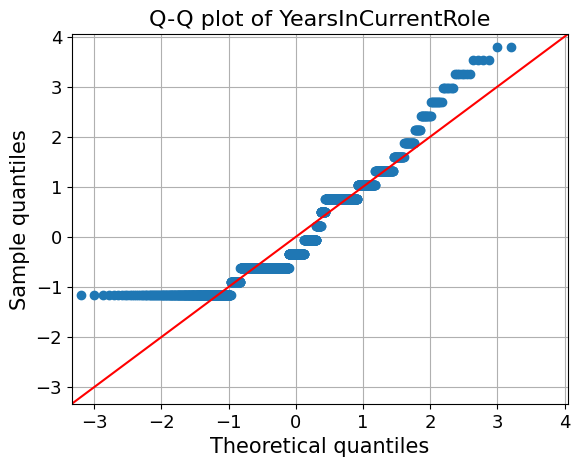

<Figure size 800x500 with 0 Axes>

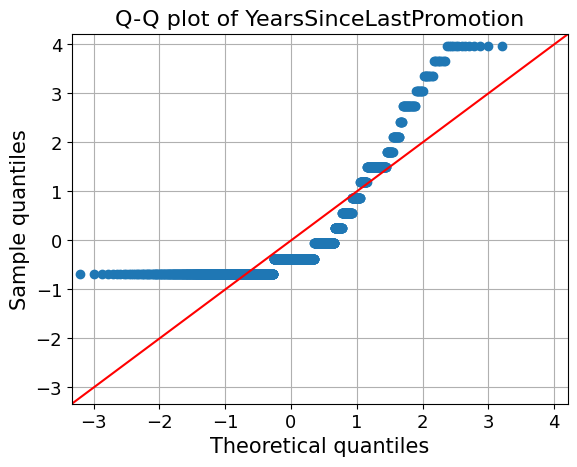

<Figure size 800x500 with 0 Axes>

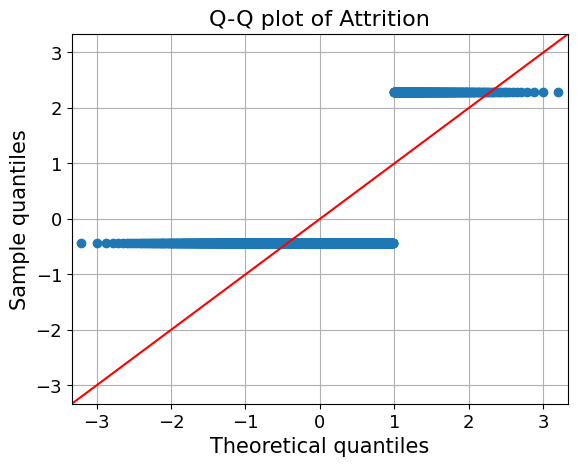

In [4]:
from statsmodels.graphics.gofplots import qqplot
data_col = data[['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobSatisfaction', 'Gender', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'Attrition']]
for c in data_col.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_col[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

The distribution of the value are different for all the columns. The distribution for each of the plots are as following.

|Column name | Distributions|
|------------|:-------------|
| Age        | Continuous distribution|
|DistanceFromHome | Continuous distribution|
|EnvironementSatisfaction| Step distribution |
|JobSatisfaction| Step distribution|
|MonthlyIncome| Continuous distribution|
|MonthlyRate| Continuous distribution|
|NumOfCompaniesWorked| Step distribution|
|PercentOfSalaryHike| Step distribution|
|PerformanceRating | Step distribution|
|StockOptionLevel | Step distribution|
|TotalWorkingYears|Right-skew distribution|
|WorkLifeBalance| Step distribution|
|YearsAtCompany| Right-Skew distribution|
|YearsInCurrentRole|Right-skew|
|YearsSinceLastPromotion|Right-skew|
|Attrition| Step distribution|

In [5]:
### Getting the count of class samples and making sure there are almost equal samples for various classes.
print("Job satisfaction Count: ")
print(data.JobSatisfaction.value_counts())

Job satisfaction Count: 
4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


As we can see above Job Satisfaction has different number of examples. The model always tend to perform better with equal number of samples for training data and might suffer from overfitting.

From the above count we can see that for the classes and samples

| class  | Sample  |
|------------|:-------------|
|  1.0    |  280   |
|  2.0    |  289   |
|  3.0    |  442   |
|  4.0    |  459   |

there is difference in values of 1.0 and 2.0 vs 3.0 and 4.0.

Thus we can assume that regularization might be able to help reduce the high variance.

On plotting correlation heatmap and viewing the values.

##Heatmap

<Axes: >

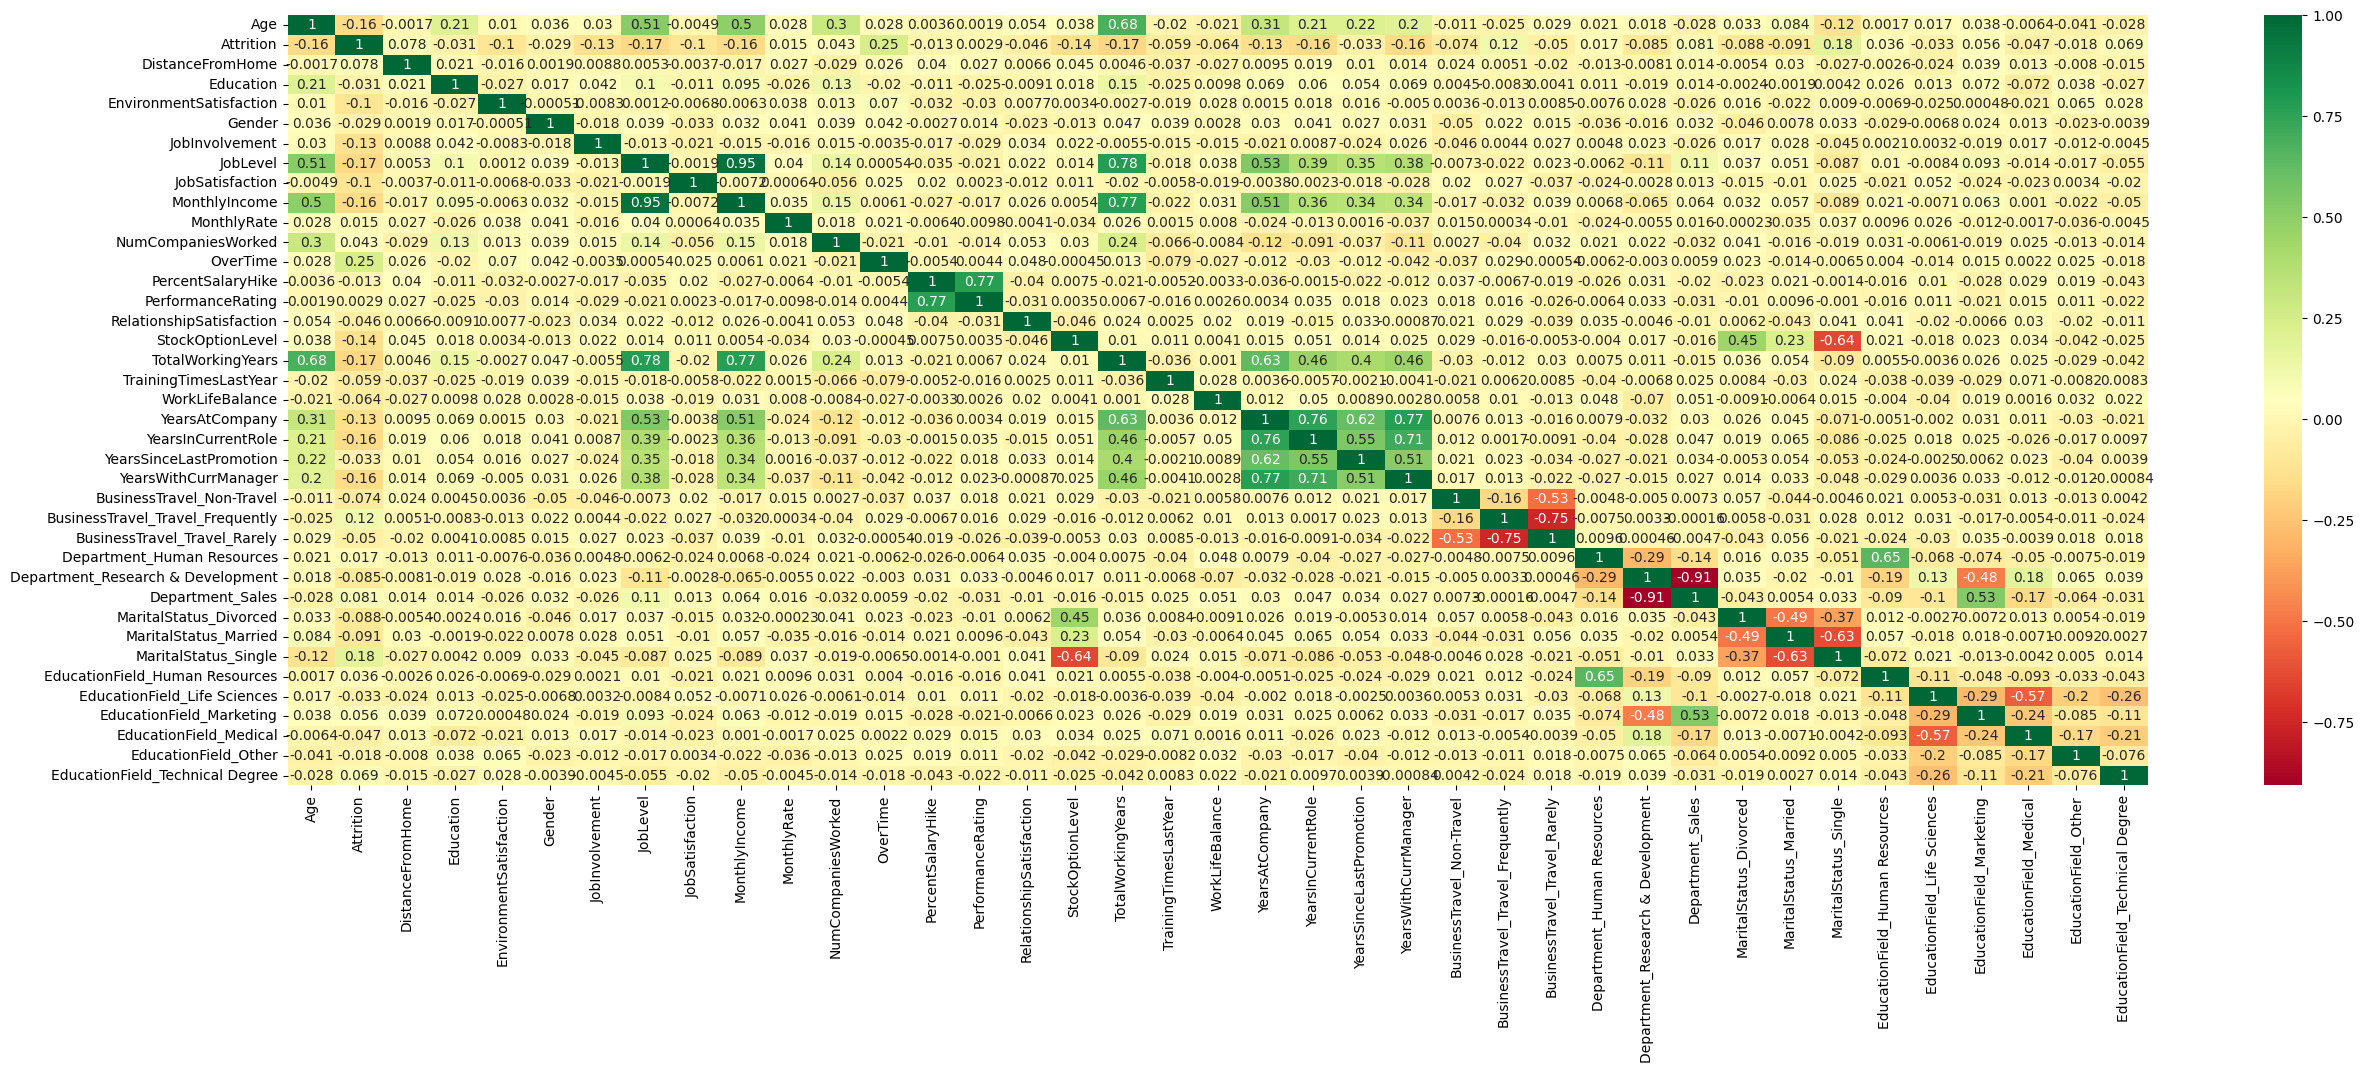

In [6]:
### Setting up the figure size
plt.figure(figsize=(30,10))
### Spcifying the type of plot, data, colormap and annotation using sns library
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

Form the above correaltion matrix we can remove some of the values as they seem to be highly related to eachother and replot the heatmap of the correlation matrix

<Axes: >

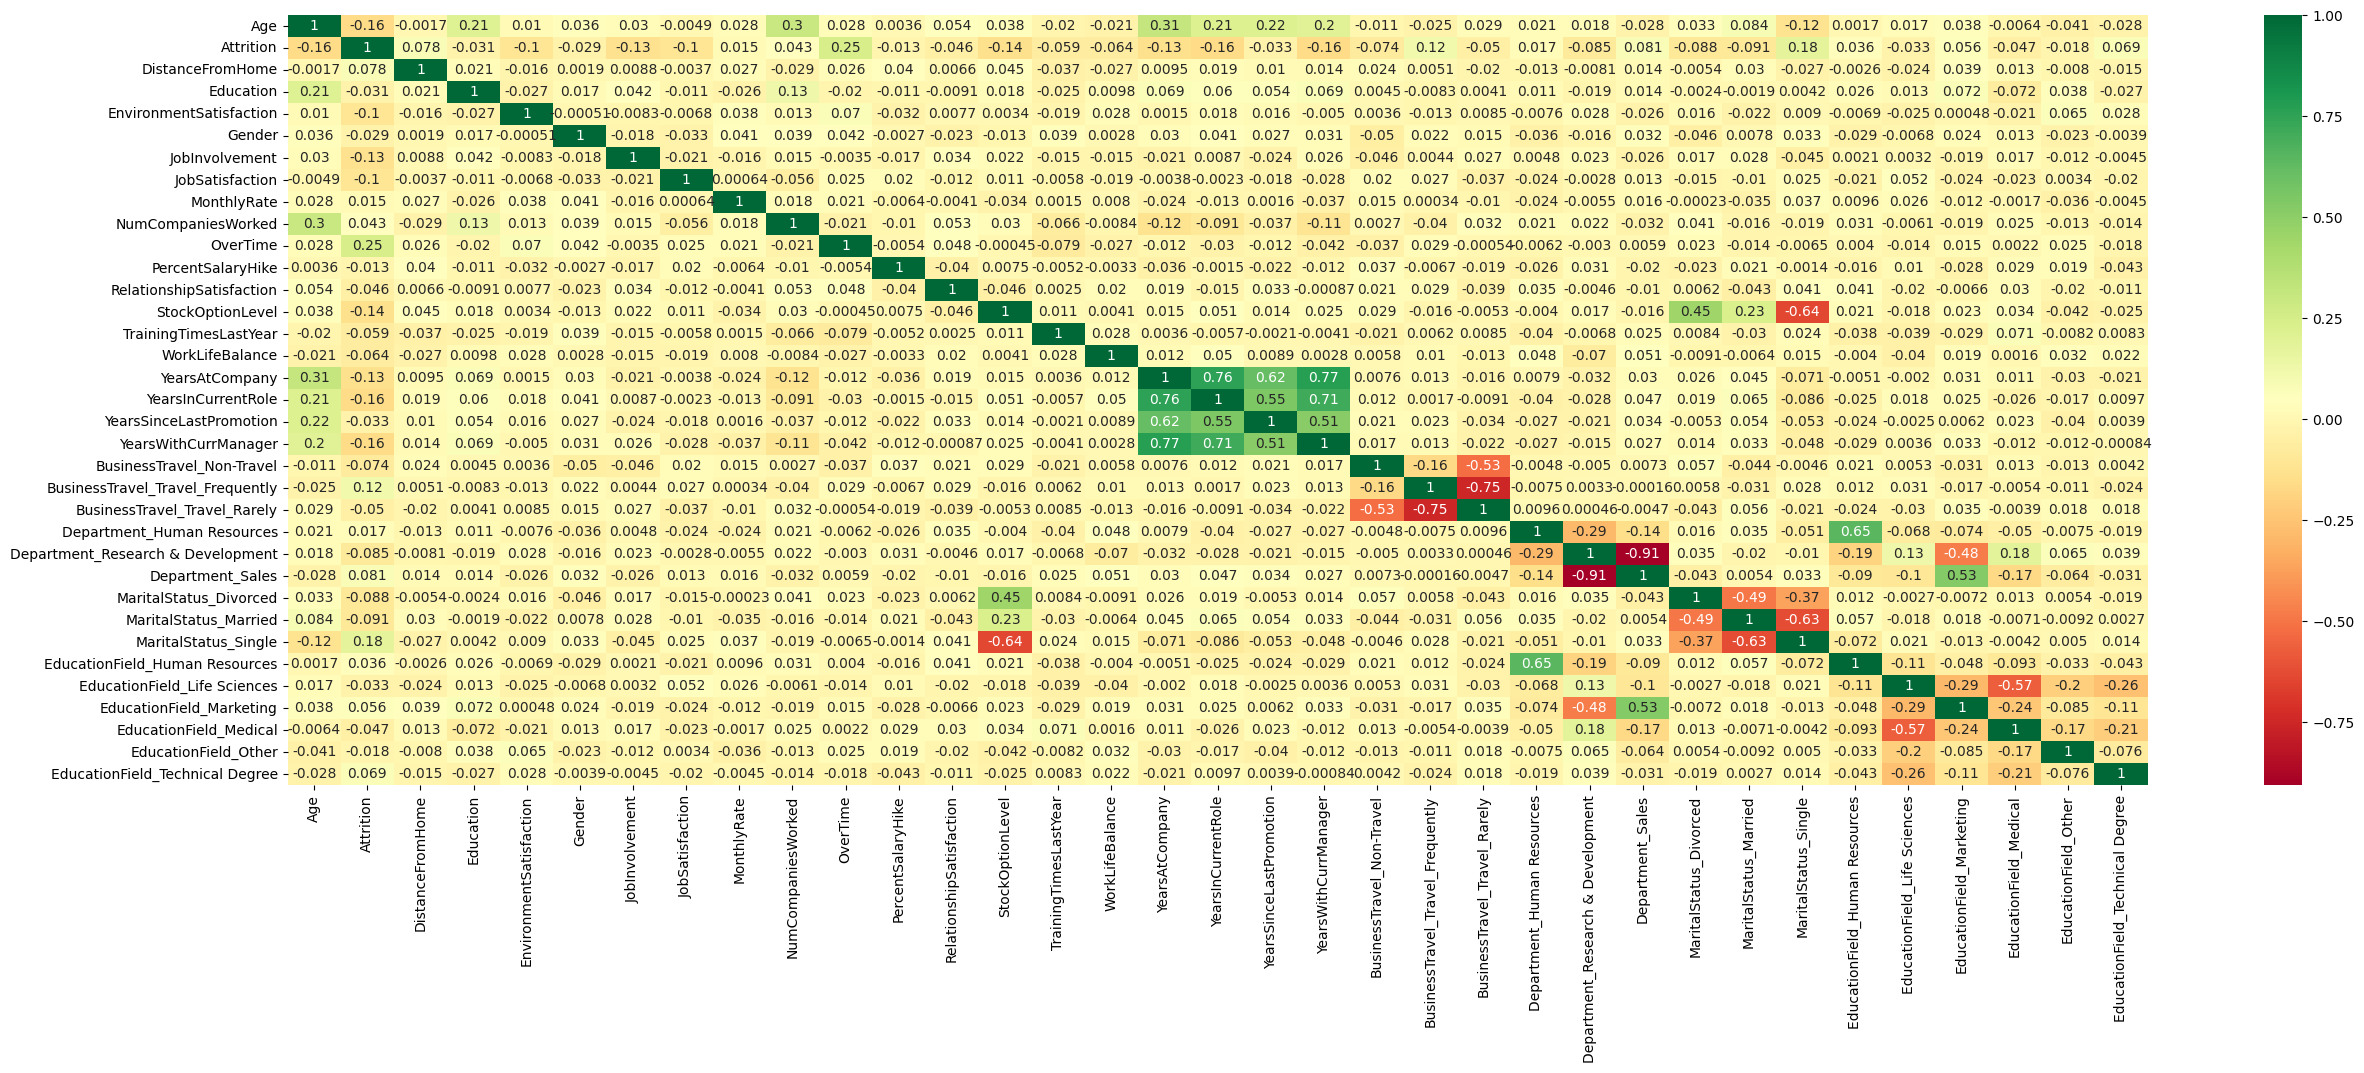

In [7]:
data = data.drop(['JobLevel', 'MonthlyIncome', 'PerformanceRating', 'TotalWorkingYears'], axis = 1)

### Replotting the heatmap to see if any other value can be removed.
plt.figure(figsize=(30,10))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

### Checking the data for outliers and scaling

<Axes: >

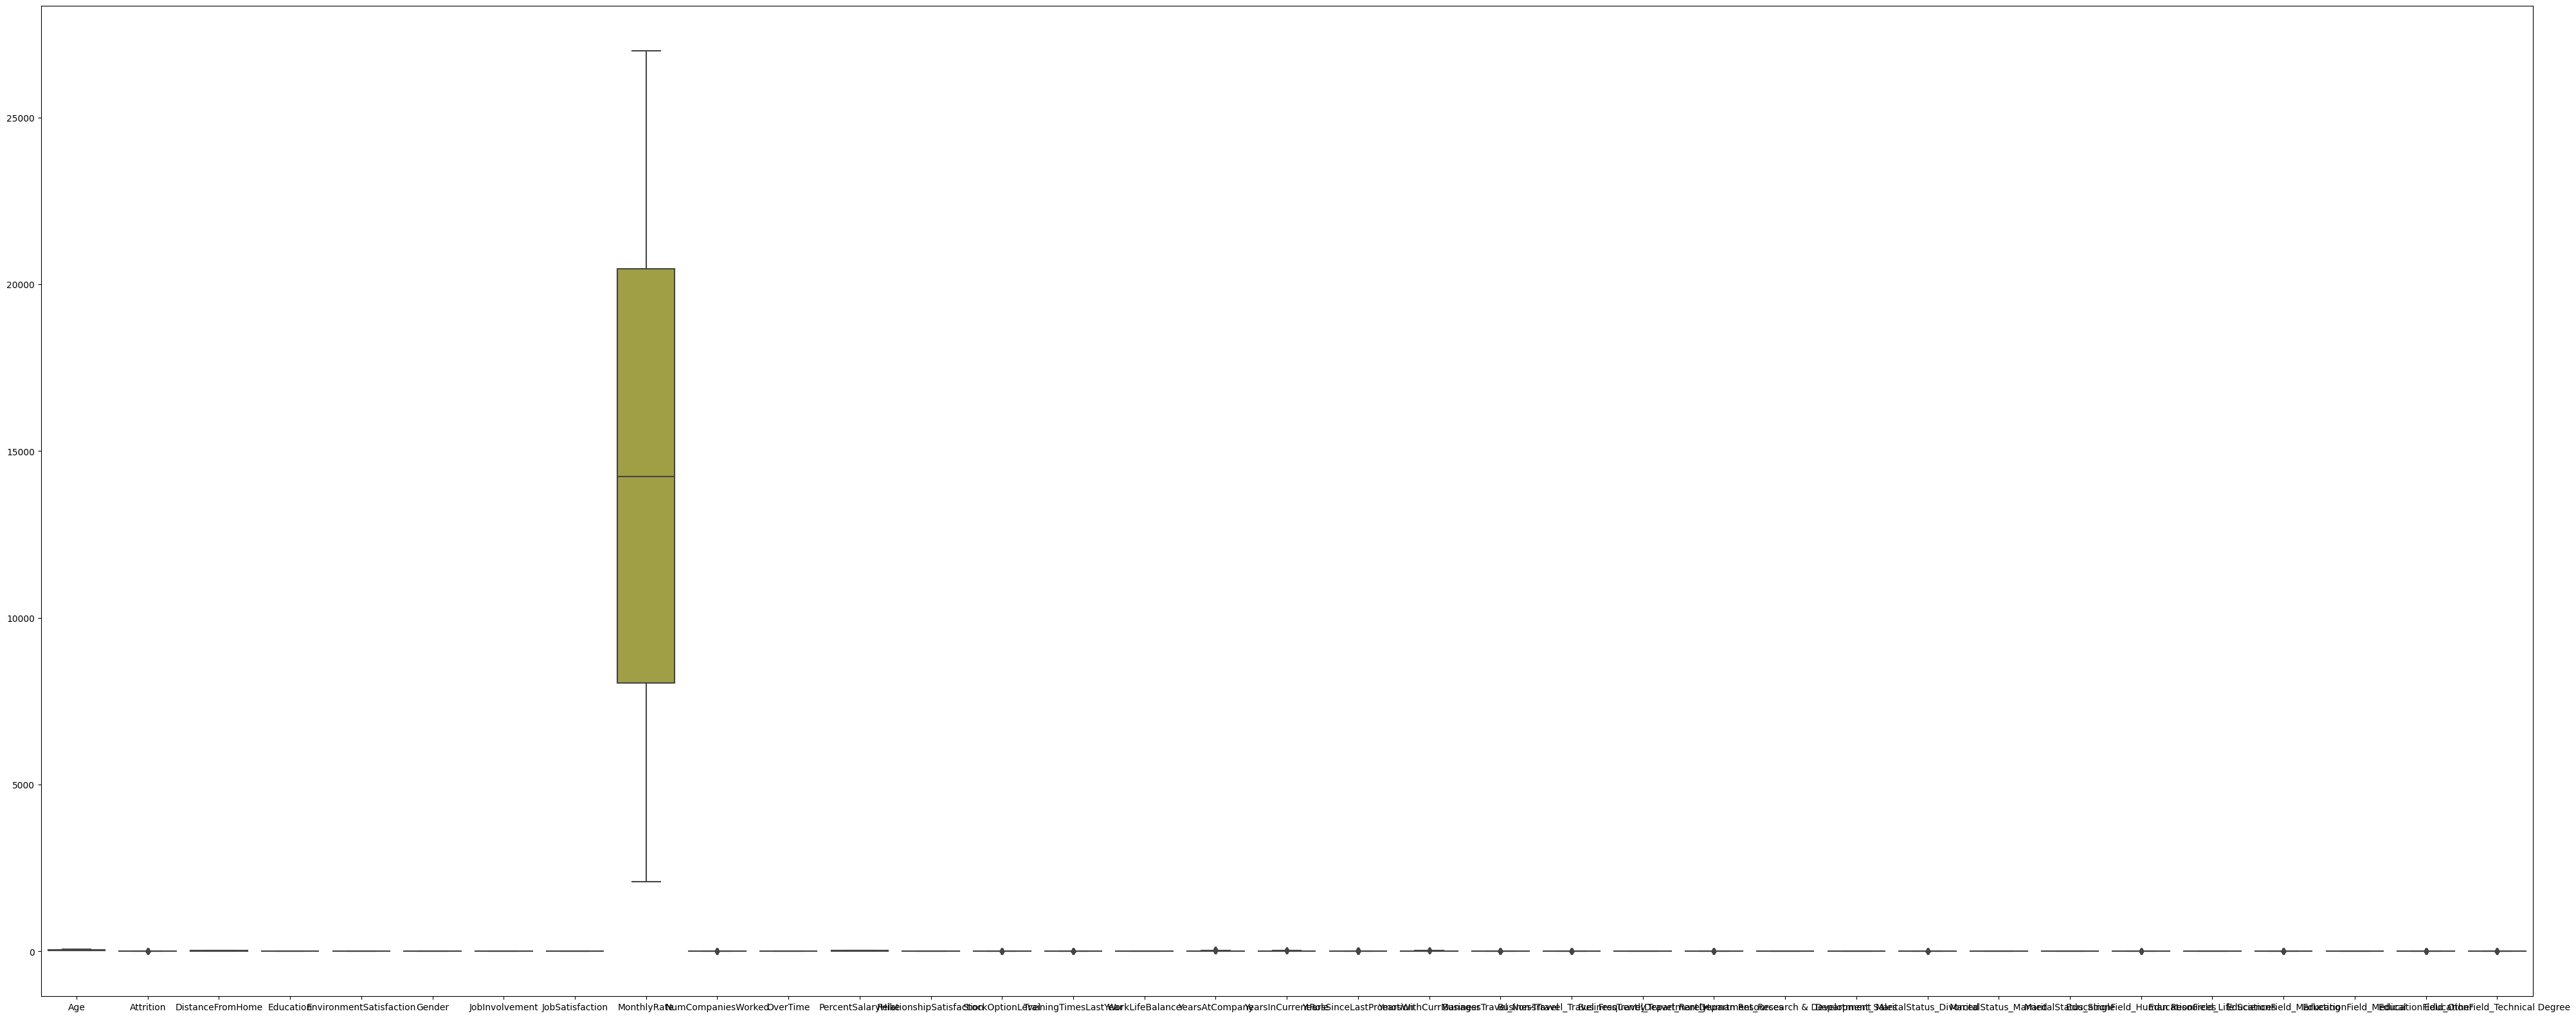

In [8]:
plt.figure(figsize=(50, 20))
sns.boxplot(data=data)

As we can see, the data needs normalization

<Axes: >

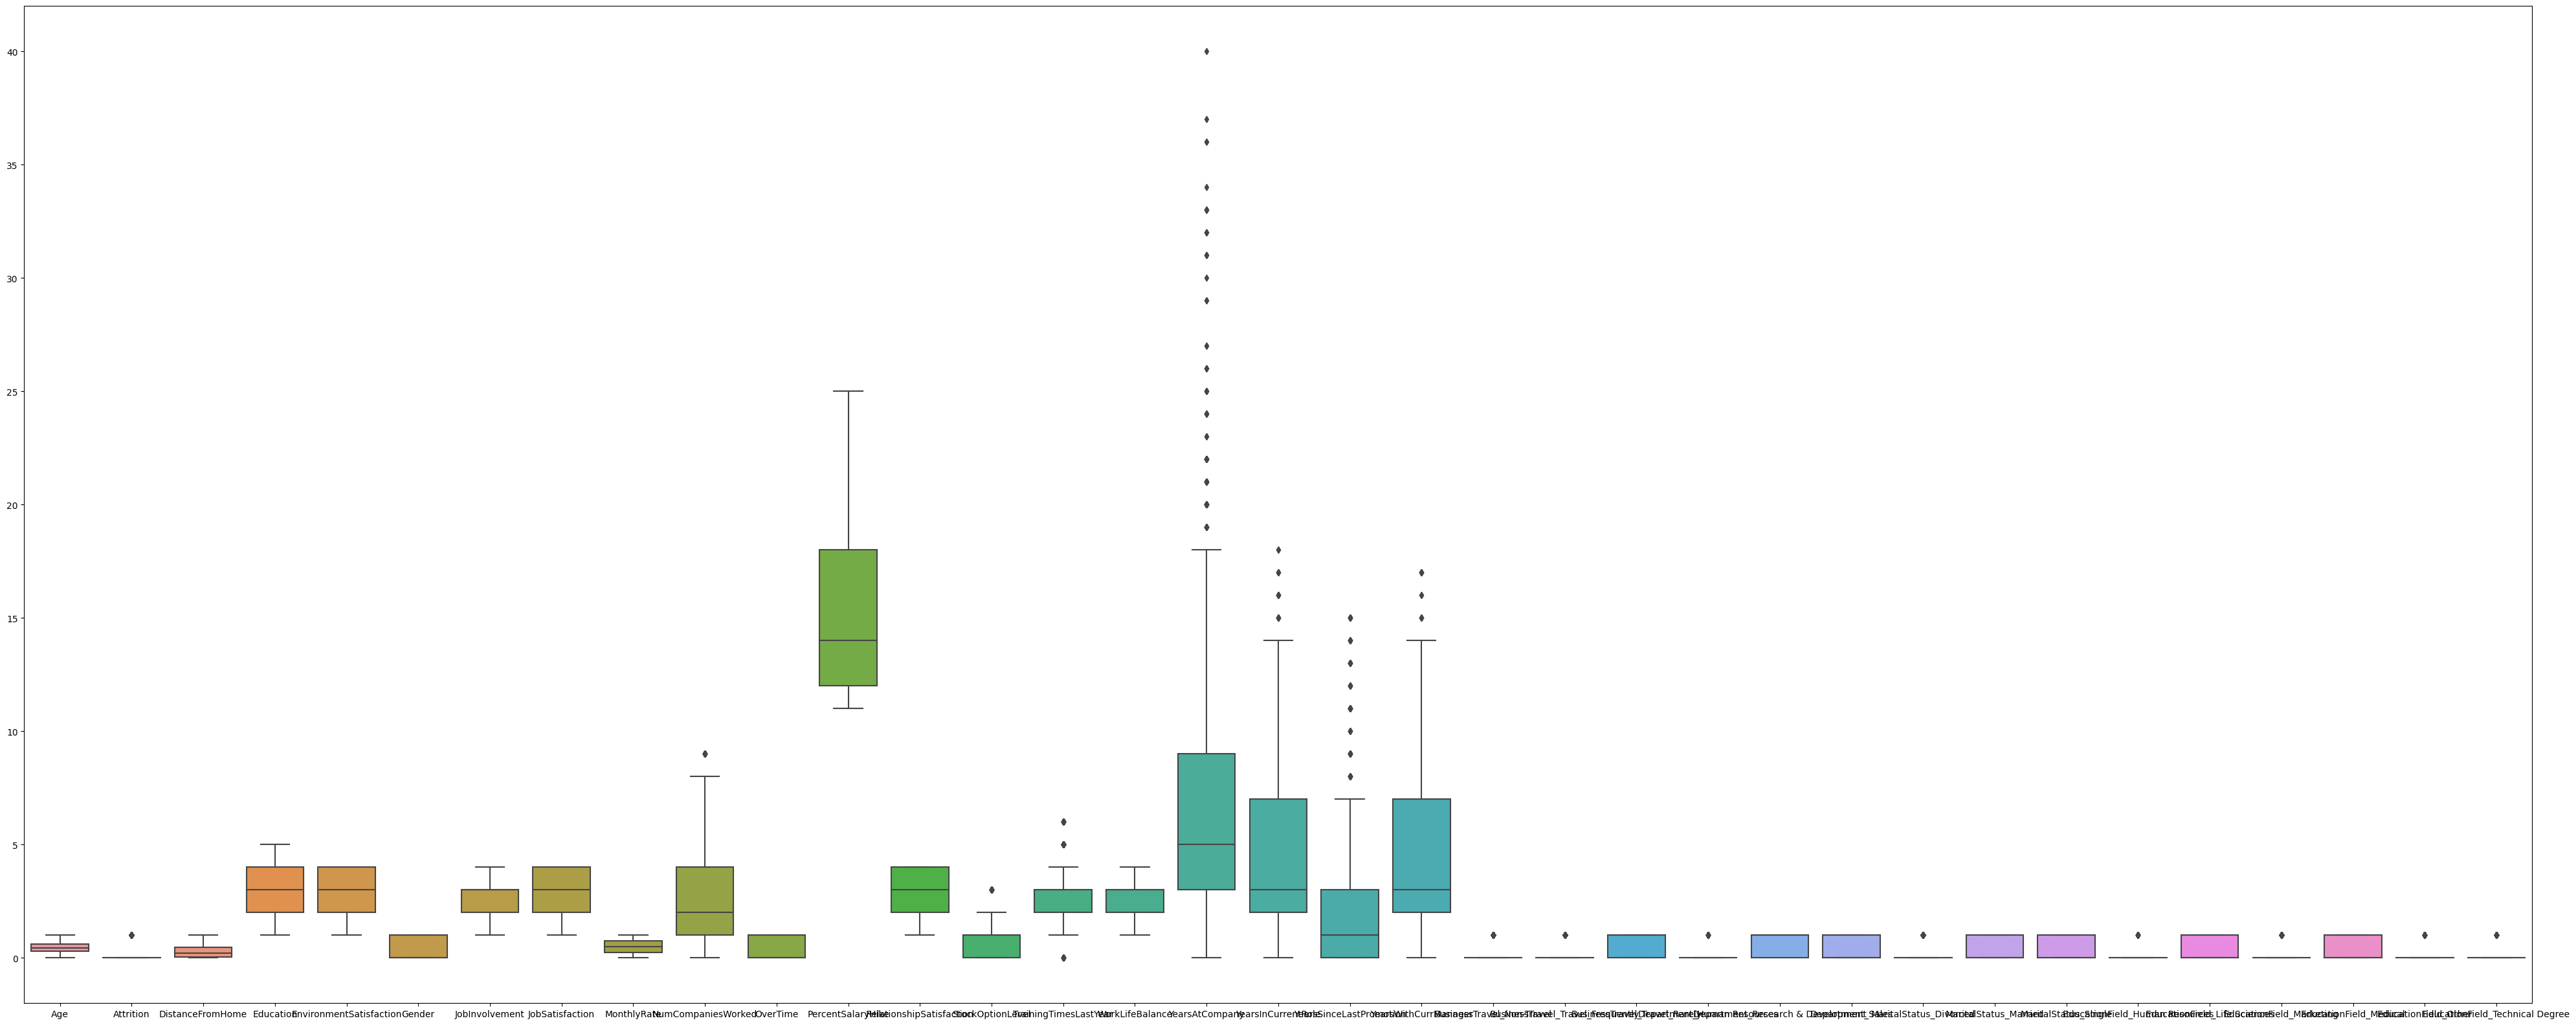

In [9]:
from sklearn import preprocessing

dataScaled = pd.get_dummies(data)
min_max_scalar = preprocessing.MinMaxScaler()


xMR = dataScaled[['MonthlyRate']].values.astype(int)
xMRS = min_max_scalar.fit_transform(xMR)
dataScaled['MonthlyRate'] = pd.DataFrame(xMRS)

xA = dataScaled[['Age']].values.astype(int)
xAS = min_max_scalar.fit_transform(xA)
dataScaled['Age'] = pd.DataFrame(xAS)

xD = dataScaled[['DistanceFromHome']].values.astype(int)
xDS = min_max_scalar.fit_transform(xD)
dataScaled['DistanceFromHome'] = pd.DataFrame(xDS)

plt.figure(figsize=(50, 20))
sns.boxplot(data=dataScaled)

In [10]:
data = dataScaled

## OLS Summary

Now to better understand if the x values and y values don't have a null hypothesis, we can use OLS Summary. </br></br>

**Note:** Null hypothesis is a test to determine if the X and Y value share some sort of relation between each other. </br></br>

To determine this we will look at F-Statistic of the OLS Summary. If the value is 0 then there is no relationship between the X and Y value. If the value is greater than 0 it means there is a relationship. The higher the value of F-statistic, the stronger the relationship between the X and Y value.

In [11]:
### Sepcifying the y value
y = data.Attrition

### Specifying the x value and dropping JobSatisfcation from data.
x = data.drop(['Attrition'], axis = 1)

### Checking if x has the right columns present
print(x.columns)
### Checking if y value is correctly selected
print(y)

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'Gender', 'JobInvolvement', 'JobSatisfaction', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree'],
      dtype='object')
0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466

In [12]:
### Splitting the data into train and test sets for both x and y value. SPecifying the shuffle (Shuffle allows for mixing data) and train size
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,shuffle = True)
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x_value = data.drop(['Attrition'], axis = 1)
linear_model = sm.OLS(data.JobSatisfaction, x_value).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:        JobSatisfaction   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.430e+29
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:13:33   Log-Likelihood:                 45099.
No. Observations:                1470   AIC:                        -9.014e+04
Df Residuals:                    1439   BIC:                        -8.997e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age   


The summary you've provided appears to be the output of an Ordinary Least Squares (OLS) regression model with the target variable as "Attrition" and 30 predictor variables. Here's an explanation of the key statistics and information in this OLS regression summary:

#Dependent Variable (Target Variable):

###Dep. Variable: Attrition
This indicates that the variable you are trying to predict or model is "Attrition," which typically refers to employees leaving the company.
#Model Summary:

###Model: OLS (Ordinary Least Squares)
Method: Least Squares
These lines specify the type of regression being used, which is OLS (ordinary least squares) regression, a common method for modeling relationships between variables.
#R-squared and Adjusted R-squared:

R-squared: 1.000
Adj. R-squared: 1.000
R-squared (R²) measures the proportion of the variance in the dependent variable (Attrition) that is explained by the independent variables (predictors) in the model. An R-squared of 1.000 indicates that the model explains all the variance in the target variable.
Adjusted R-squared adjusts the R-squared value for the number of predictors in the model. An adjusted R-squared of 1.000 suggests that the model fits the data extremely well, possibly overfitting.
#F-statistic:

F-statistic: 4.430e+29
Prob (F-statistic): 0.00
The F-statistic tests the overall significance of the regression model. In this case, the extremely high F-statistic and a p-value (Prob) of 0.00 indicate that the model is statistically significant.
#Model Fit and Log-Likelihood:

Date and Time: These lines show when the analysis was conducted.
Log-Likelihood: 45099.
AIC (Akaike Information Criterion): -9.014e+04
BIC (Bayesian Information Criterion): -8.997e+04
These values provide information about the goodness of fit of the model. Lower AIC and BIC values indicate better model fit.
#Sample Information:

No. Observations: 1470
Df Residuals: 1439
Df Model: 30
These lines provide information about the number of observations (data points) and the degrees of freedom for both the residuals and the model.
#Covariance Type:

Covariance Type: nonrobust
This specifies the type of covariance estimation used in the regression analysis. "Nonrobust" indicates that standard OLS assumptions were used.
Overall, the summary suggests that the regression model has a very high R-squared, indicating an excellent fit to the data. However, it's important to critically evaluate such results because an R-squared of 1.000 and other extreme values may indicate potential issues with the model, such as overfitting or data anomalies. Careful validation and interpretation of the model's coefficients and predictions are essential to ensure the model's reliability and usefulness.

## Worked Example 2 'Laptop Dataset'


##Setting Up

In [13]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=f863f63444a70bf71d7d869aef35a94e0b917916207709dc76523ad40bf02447
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

##Reading the Dataset

In [15]:
data = pd.read_csv("https://raw.githubusercontent.com/Aditya260698/Data-Science-Engineering-Methods-and-Tools/main/laptopsds.csv", encoding="Latin")
#data.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [16]:
data.to_csv("/content/laptopsds.csv", encoding="utf-8")

In [17]:
data

,Manufacturer,Model Name,Category,Screen Size,Screen,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,898.94
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,"14.0""",IPS Panel Full HD / Touchscreen 1920x1080,4GB,128GB SSD,Intel HD Graphics 520,Windows,10,1.8kg,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,"13.3""",IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,512GB SSD,Intel HD Graphics 520,Windows,10,1.3kg,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,"14.0""",1366x768,2GB,64GB Flash Storage,Intel HD Graphics,Windows,10,1.5kg,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,"15.6""",1366x768,6GB,1TB HDD,AMD Radeon R5 M330,Windows,10,2.19kg,764.00


11 physical characteristics of Laptop dataset i.e. Manufacturer, Model Name, Category, Screen Size, Screen, RAM, Storage, GPU, Operating System, Weight - The Independent variables and Price (Euros) - The dependent variable

There are a total of 1303 observations.

In [18]:
data.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    170
Weight                        0
Price (Euros)                 0
dtype: int64

# Data cleaning
The dataset contains various columns like Manufacturer ,Model Name, Category, GPU, Operating System Version do not directly corelate with the price of the laptop so we can drop those columns. On the other hand the data contains valuse which are important to perdict the price of the laptop but are present in String datatype so we are converting those values in Float or Int for calculating the results and work on the data.

In [19]:
data = data.dropna()

In [20]:
data['Screen Size'] = data['Screen Size'].str.replace(r'\D', '').astype(float)
data['RAM'] = data['RAM'].str.replace(r'\D', '').astype(int)
data[' Storage'] = data[' Storage'].str.replace(r'\D', '').astype(int)
data['Weight'] = data['Weight'].str.replace(r'\D', '').astype(float)

The default value of regex will change from True to False in a future version.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
The default value of regex will change from True to False in a future version.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
The default value of regex will change from True to False in a future version.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [21]:
one_hot = {'Windows':1, 'No OS':0, 'Linux':2, 'Chrome OS':3, 'macOS':4, 'Mac OS':4, 'Android':5}

data['Operating System'] = [one_hot[item] for item in data['Operating System']]
print(data.head())

   Manufacturer       Model Name   Category  Screen Size  \
5          Acer         Aspire 3   Notebook        156.0   
6         Apple      MacBook Pro  Ultrabook        154.0   
8          Asus  ZenBook UX430UN  Ultrabook        140.0   
9          Acer          Swift 3  Ultrabook        140.0   
13         Dell    Inspiron 3567   Notebook        156.0   

                                Screen  RAM   Storage  \
5                             1366x768    4       500   
6   IPS Panel Retina Display 2880x1800   16       256   
8                    Full HD 1920x1080   16       512   
9          IPS Panel Full HD 1920x1080    8       256   
13                   Full HD 1920x1080    4       256   

                        GPU  Operating System Operating System Version  \
5             AMD Radeon R5                 1                       10   
6   Intel Iris Pro Graphics                 4                        X   
8      Nvidia GeForce MX150                 1                       10   



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


##QQ Plot

<Figure size 800x500 with 0 Axes>

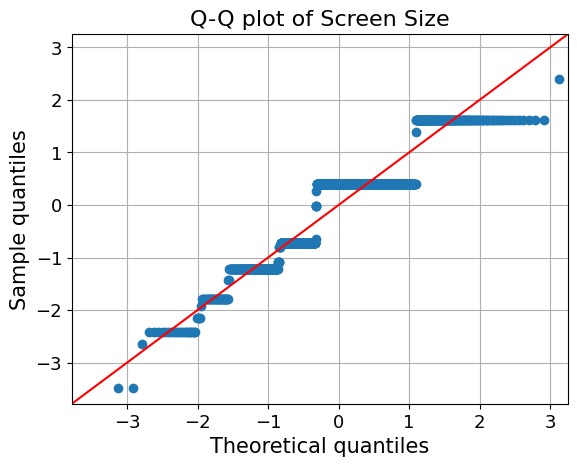

<Figure size 800x500 with 0 Axes>

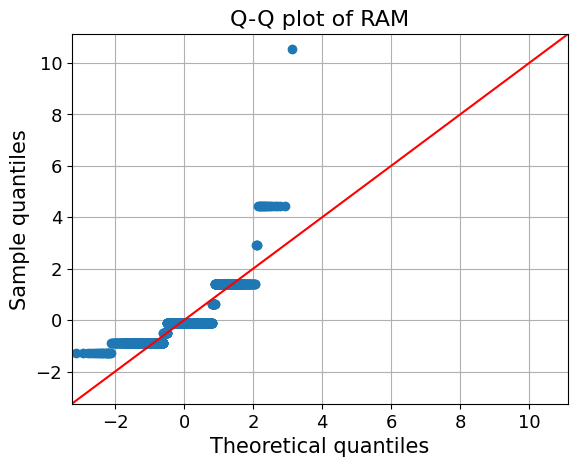

<Figure size 800x500 with 0 Axes>

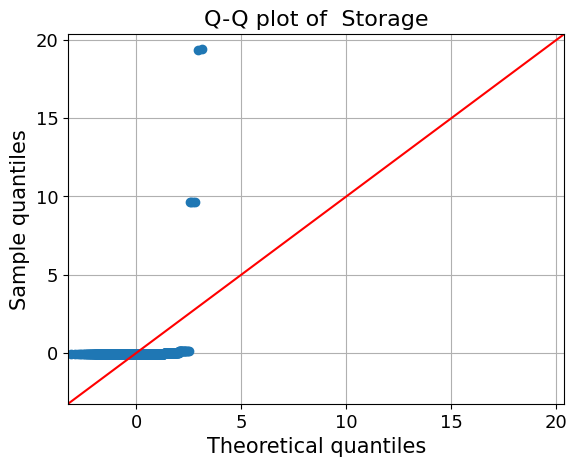

<Figure size 800x500 with 0 Axes>

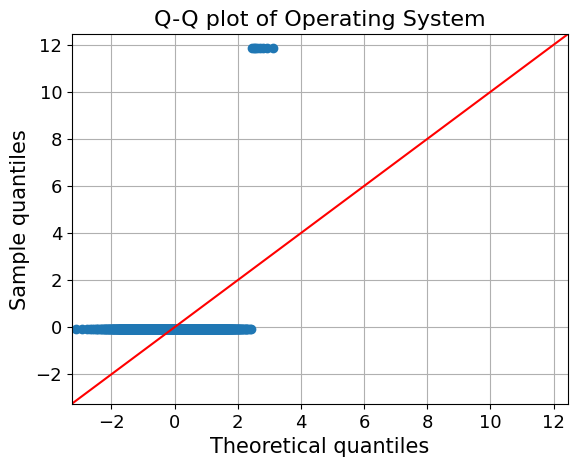

<Figure size 800x500 with 0 Axes>

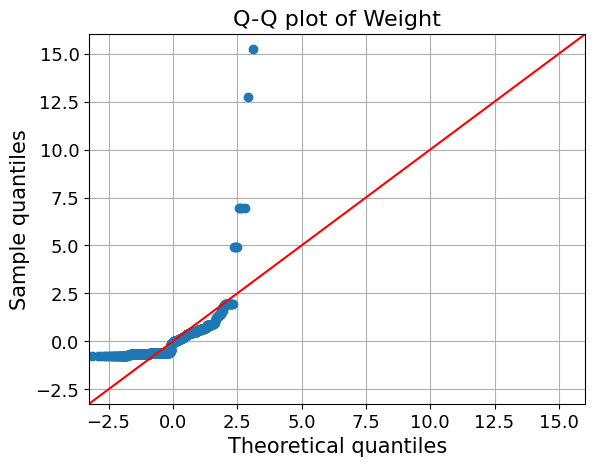

<Figure size 800x500 with 0 Axes>

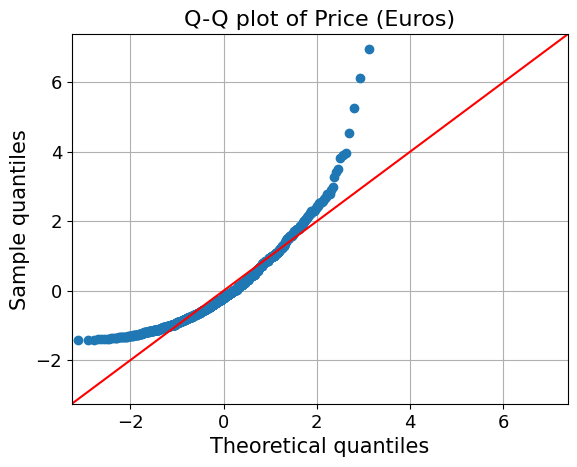

In [22]:
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['Screen Size', 'RAM', ' Storage','Operating System', 'Weight', 'Price (Euros)']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

|Column name | Distributions|
|------------|:-------------|
| Screen Size    | Step distribution|
|RAM | Step distribution|
|Storage| Step distribution |
|Operating System| Step distribution|
|Weight| Exponential distribution|
|Price (Euros)| Exponential distribution|



##Data Normalization

<Axes: >

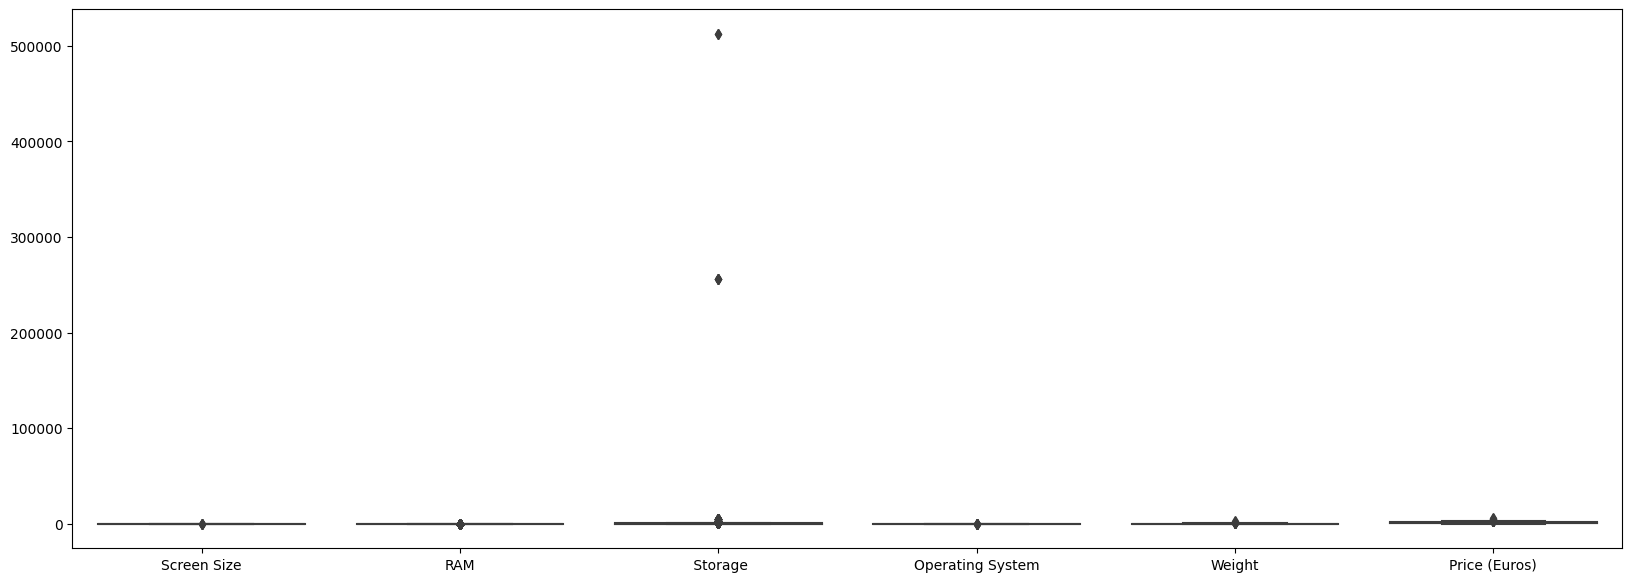

In [23]:
plt.figure(figsize=(20,7))
#data = data[['Screen Size', 'RAM', ' Storage', 'Operating System', 'Weight', 'Price (Euros)']]
sns.boxplot(data=data_norm)

We need to normalize the data for Storage, Screen Size, Operating System, RAM, Weight, Price (Euros).

<Axes: >

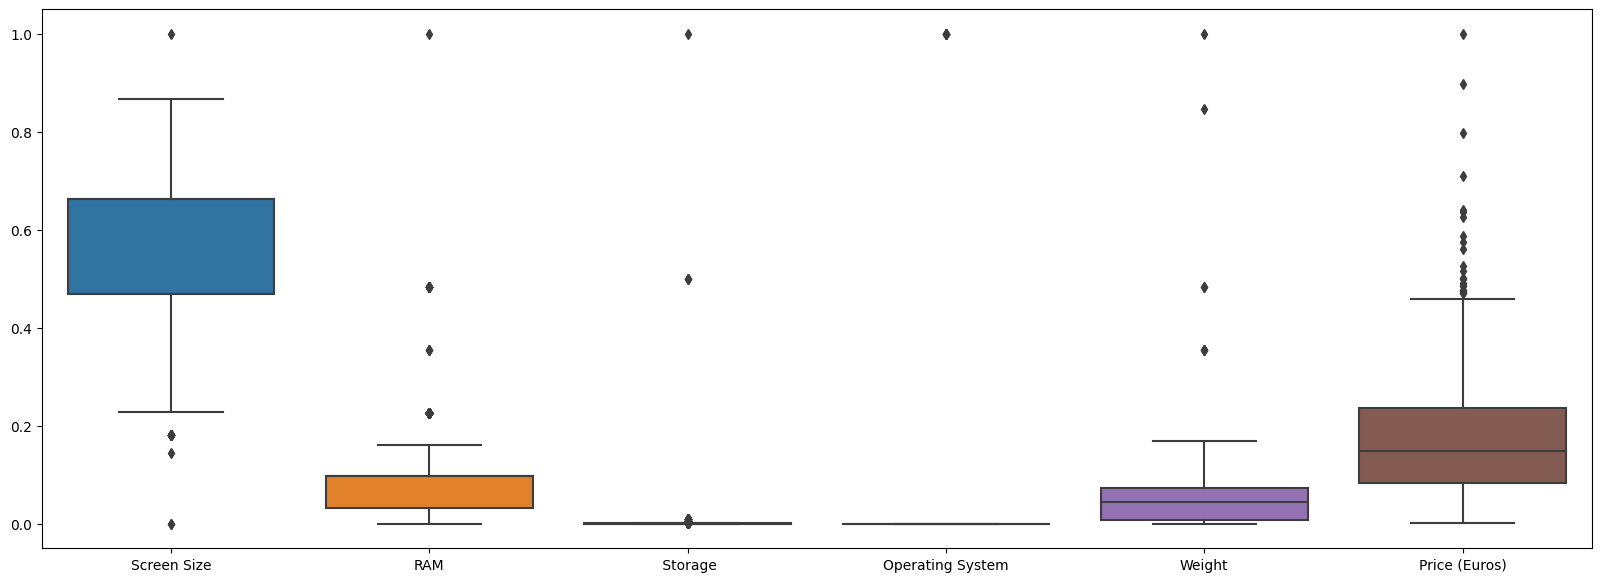

In [24]:
data = pd.get_dummies(data_norm)
from sklearn import preprocessing

xJS = data[[' Storage']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
xS = min_max_scaler.fit_transform(xJS)
data[[' Storage']] = pd.DataFrame(xS)

xJSS = data[['Screen Size']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
xSS = min_max_scaler.fit_transform(xJSS)
data[['Screen Size']] = pd.DataFrame(xSS)

xJOS = data[['Operating System']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
xOS = min_max_scaler.fit_transform(xJOS)
data[['Operating System']] = pd.DataFrame(xOS)

xJR = data[['RAM']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
xR = min_max_scaler.fit_transform(xJR)
data[['RAM']] = pd.DataFrame(xR)

xJW = data[['Weight']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
xW = min_max_scaler.fit_transform(xJW)
data[['Weight']] = pd.DataFrame(xW)

xJP = data[['Price (Euros)']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
xP = min_max_scaler.fit_transform(xJP)
data[['Price (Euros)']] = pd.DataFrame(xP)


plt.figure(figsize=(20,7))
sns.boxplot(data=data)

1)Looking at the boxplot we can see that there are outliers for Screen Size, RAM, Storage, Weight and Price (Euros).

2) Most outliers is in Price (Euros) and the value is between 0.4-0.6, and it is negatively skewed, meaning most of the data values are concentrated at the lower end of the scale aling with the median

##Heatmap

<Axes: >

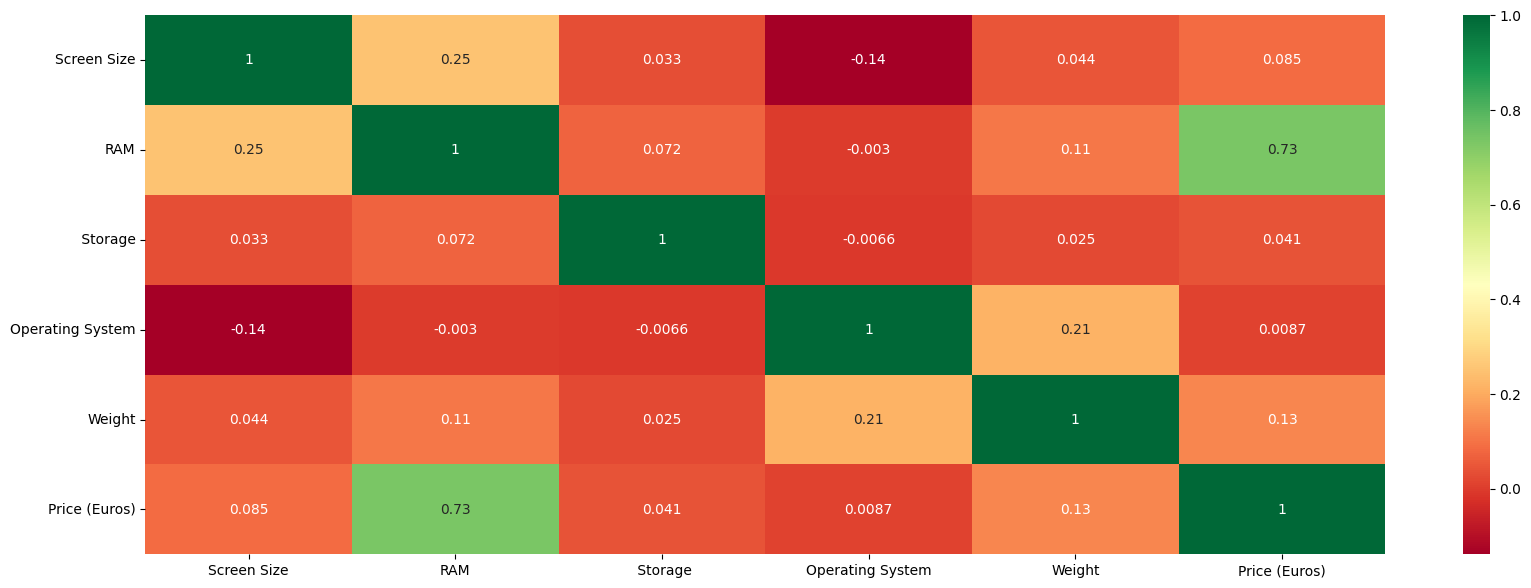

In [25]:
plt.figure(figsize=(20,7))
sns.heatmap(data_norm.corr(), annot=True, cmap='RdYlGn')


We can see there are lot of co-relation among the variables. The co-relation between RAM and Price (Euros) being the highest (0.73), it may mean that essentially both are measuring or predicting same thing

##OLS

In [26]:
import statsmodels.api as sm
model = sm.OLS(data_norm['Price (Euros)'], data_norm[['Screen Size', 'RAM', ' Storage', 'Operating System', 'Weight']].replace(',', '', regex = True).astype(float)).fit()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Price (Euros)   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              1648.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):                        0.00
Time:                        02:13:46   Log-Likelihood:                         -8602.5
No. Observations:                1133   AIC:                                  1.721e+04
Df Residuals:                    1128   BIC:                                  1.724e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Screen Size          1.0131      0.393      2.578      0.010       0.242       1.784
RAM                 99.7715      2.819     35.390      0.000      94.240     105.303
 Storage            -0.0004      0.001     -0.677      0.498      -0.001       0.001
Operating System   133.8631     52.082      2.570      0.010      31.675     236.051
Weight               0.2242      0.091      2.473      0.014       0.046       0.402
==============================================================================
Omnibus:                      219.392   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              909.449
Skew:                           0.862   Prob(JB):                    3.28e-198
Kurtosis:                       7.037   Cond. No.                     9.62e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By using model summary using ordinary least squared regression, we can see that higher T-statistic value gives more importance to the significance of the predictor variables.


- The model explains about 88% of the variation in laptop prices (R-squared = 0.880).
- The overall model is statistically significant (F-statistic = 1648, p < 0.05).
- Individual predictors like RAM, Screen Size, Operating System, and Weight are statistically significant (p < 0.05) and have estimated impacts on laptop prices.
- For example, a one-unit increase in RAM is associated with an increase of approximately 99.77 Euros in laptop price.
- Residuals may not be normally distributed based on Omnibus and Jarque-Bera tests.
- No significant autocorrelation is detected in the residuals (Durbin-Watson = 1.999).
- There might be multicollinearity among the independent variables, given the large condition number (9.62e+04).

In short, this regression model is reasonably good at explaining laptop prices, but there are potential issues with the distribution of residuals and multicollinearity among predictors.

#**References**

The references used for this article are as follows:

- https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
- https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html
- https://docs.h2o.ai/h2o/latest-stable/h2o-docs/training-models.html
- https://betterdatascience.com/lime/#:~:text=What%20is%20LIME%3F,and%20image%20classifiers%20(currently)
- https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Model_Interpretability/SHAP%20and%20LIME%20analysis%20Walkthrough.ipynb
- https://mljar.com/blog/feature-importance-in-random-forest/

**MIT License**

Copyright © 2023 Aditya Pravin Pande

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.